# orbPlot testing
24/10/20

Testing on Stimpy to fix import issues with chemlab functions, hopefully.

Q: why did this work OK in the past...? Local edits have been lost?

A: yes, local edit to `chemlab.qc.pgbf.py`, added `from functools import reduce`

Also added subplots, and tried to fix cmap - still dodgy, may need to set directly per volume?


In [1]:
import sys
# For module testing, include path to module here, otherwise use global installation
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
    winFlag = True
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    winFlag = False
    
sys.path.append(modPath)
import epsproc as ep

# Plotters
from epsproc.plot import hvPlotters

# Multijob class dev code
from epsproc.classes.multiJob import ePSmultiJob

* pyevtk not found, VTK export not available. 


In [2]:
# TO FIX:
# - Add "from functools import reduce  # PH Added 13/04/20 to fix import issues." to chemlab.qc.pgbf.py
# - Should be able to import or patch this at runtime instead of fixing in source?

from epsproc.vol import orbPlot

# chemPath = r'/home/femtolab/python/chem/tools/chemlab/chemlab'  # Linux dev machine
chemPath = r'D:\temp\chemlab\chemlab'  # Win dev machine
out = orbPlot.importChemLabQC(chemPath = chemPath)

# Test class
# filename = r"/home/femtolab/ePS/XeF2/electronic_structure/xef2_SPKrATZP_rel_geom.log"  # XeF2 Gamess file  OK
filename = r"D:\projects\ePolyScat\xef2\electronic_structure\xef2_SPKrATZP_rel_geom.log"

mo = orbPlot.molOrbPlotter(chemPath = chemPath, fileIn = filename)

# Added
# from qc.utils import reduce 



Import OK: Chemlab module <module 'qc.wavefunction' from 'D:\\temp\\chemlab\\chemlab\\qc\\wavefunction.py'>
Import OK: Chemlab module <module 'qc.wavefunction' from 'D:\\temp\\chemlab\\chemlab\\qc\\wavefunction.py'>
Found electronic structure file: D:\projects\ePolyScat\xef2\electronic_structure\xef2_SPKrATZP_rel_geom.log
Read 3 atoms and 160 MOs
*** Grids set OK
StructuredGrid (0x1f2118a19a8)
  N Cells:	117649
  N Points:	125000
  X Bounds:	-2.937e+00, 2.937e+00
  Y Bounds:	-2.937e+00, 2.937e+00
  Z Bounds:	-2.937e+00, 2.937e+00
  Dimensions:	50, 50, 50
  N Arrays:	0



In [3]:
orbs = [21,22,23,24,25]
orbList = [str(item) for item in orbs]
orbList

['21', '22', '23', '24', '25']

In [4]:
[mo.calcOrb(orbN = orbN) for orbN in orbs]

[None, None, None, None, None]

In [5]:
mo.vol

StructuredGrid (0x1f2118a19a8)
  N Cells:	117649
  N Points:	125000
  X Bounds:	-2.937e+00, 2.937e+00
  Y Bounds:	-2.937e+00, 2.937e+00
  Z Bounds:	-2.937e+00, 2.937e+00
  Dimensions:	50, 50, 50
  N Arrays:	5

In [6]:
mo.vol.array_names

['21', '22', '23', '24', '25']

In [7]:
# Checking cmapping code and limits
import numpy as np
isoValsPC = np.array([0.1, 0.5])
isoValsPC

item = '21'
limitVals = [mo.vol[item].min(), mo.vol[item].max(), np.abs(mo.vol[item]).mean()]

isoValsOrb = np.r_[isoValsPC, -isoValsPC] * limitVals[2] 

In [8]:
[isoValsOrb.min(), isoValsOrb.max()]

[-3.5489746058290516e-06, 3.5489746058290516e-06]

In [9]:
temp = np.r_[isoValsPC, -isoValsPC]
temp.sort()
temp

array([-0.5, -0.1,  0.1,  0.5])

Volume: 21, limitVals: [-0.01691757384003943, 0.03388671373203923, 7.097949211658103e-06], isoValsOrb: [-7.09794921e-06 -4.25876953e-06 -1.41958984e-06  1.41958984e-06
  4.25876953e-06  7.09794921e-06]
Volume: 22, limitVals: [-0.2349145247591583, 0.2349145247591583, 2.018219042879443e-05], isoValsOrb: [-2.01821904e-05 -1.21093143e-05 -4.03643809e-06  4.03643809e-06
  1.21093143e-05  2.01821904e-05]


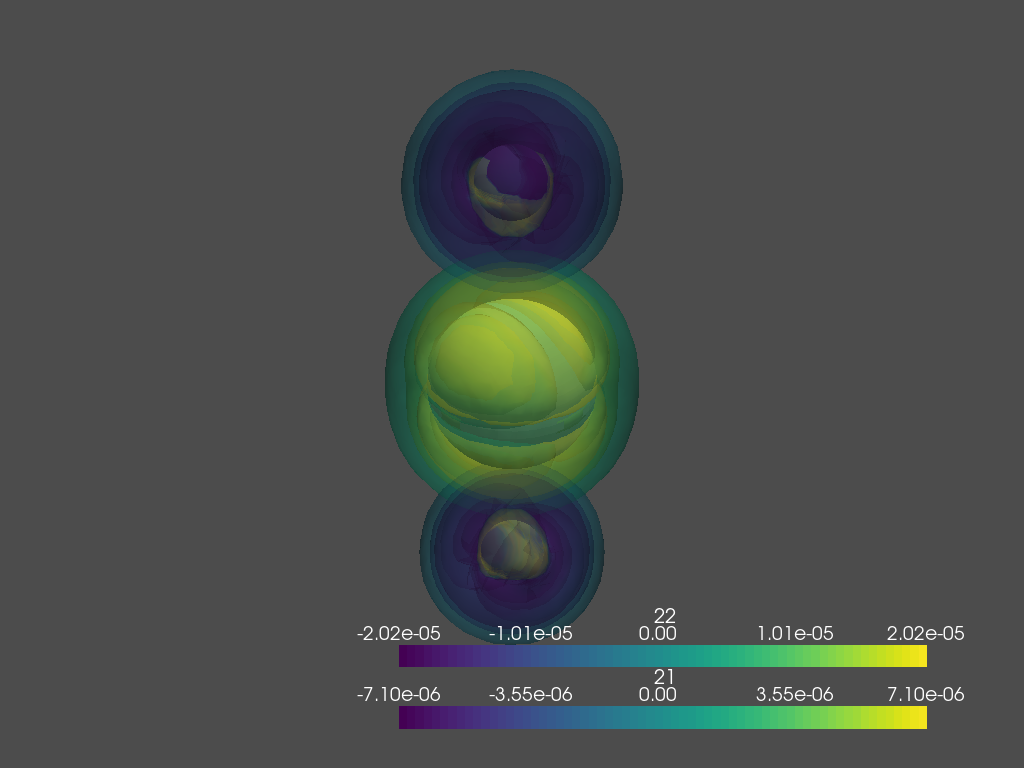

In [10]:
# mo.plotOrb(orbN = ['21','22'], interactive = False, subplots = True, isoValsPC = [0.01, 0.1, 0.3, 0.5, 0.7], verbose = 1)
mo.plotOrb(orbN = ['21','22'], interactive = False, subplots = False, verbose = 1)


Volume: 21, limitVals: [-0.01691757384003943, 0.03388671373203923, 7.097949211658103e-06], isoValsOrb: [-7.09794921e-06 -4.25876953e-06 -1.41958984e-06  1.41958984e-06
  4.25876953e-06  7.09794921e-06]


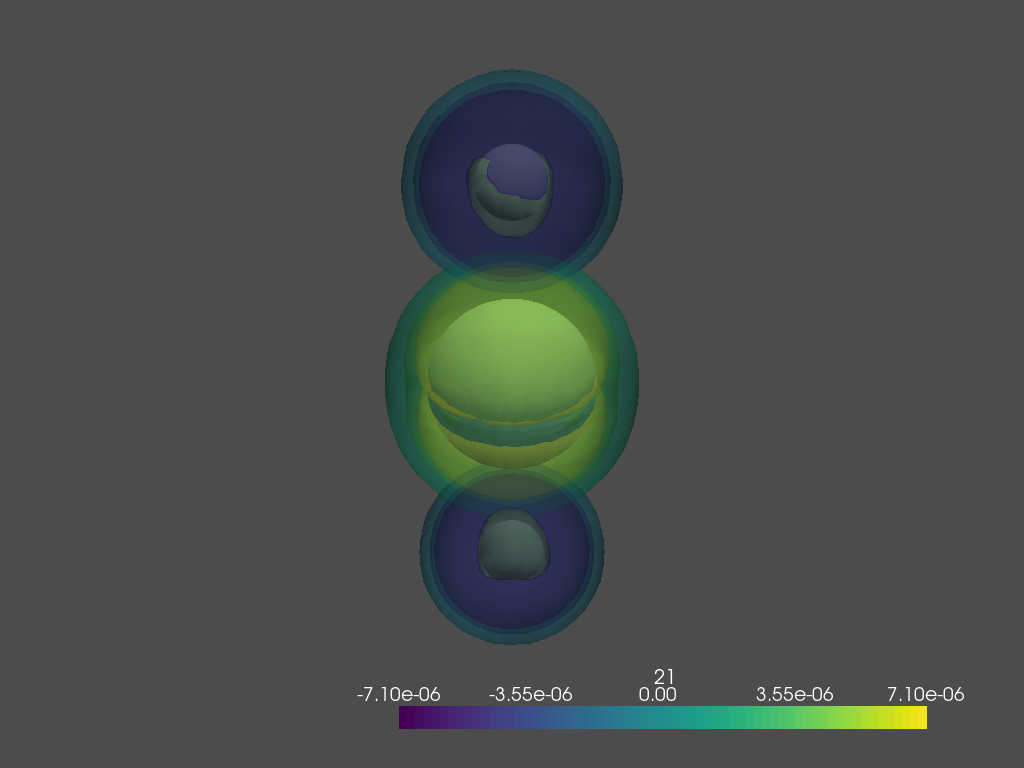

In [11]:
# mo.plotOrb(orbN = ['21','22'], interactive = False, subplots = True, isoValsPC = [0.01, 0.1, 0.3, 0.5, 0.7], verbose = 1)
mo.plotOrb(orbN = ['21'], interactive = False, subplots = False, verbose = 1)


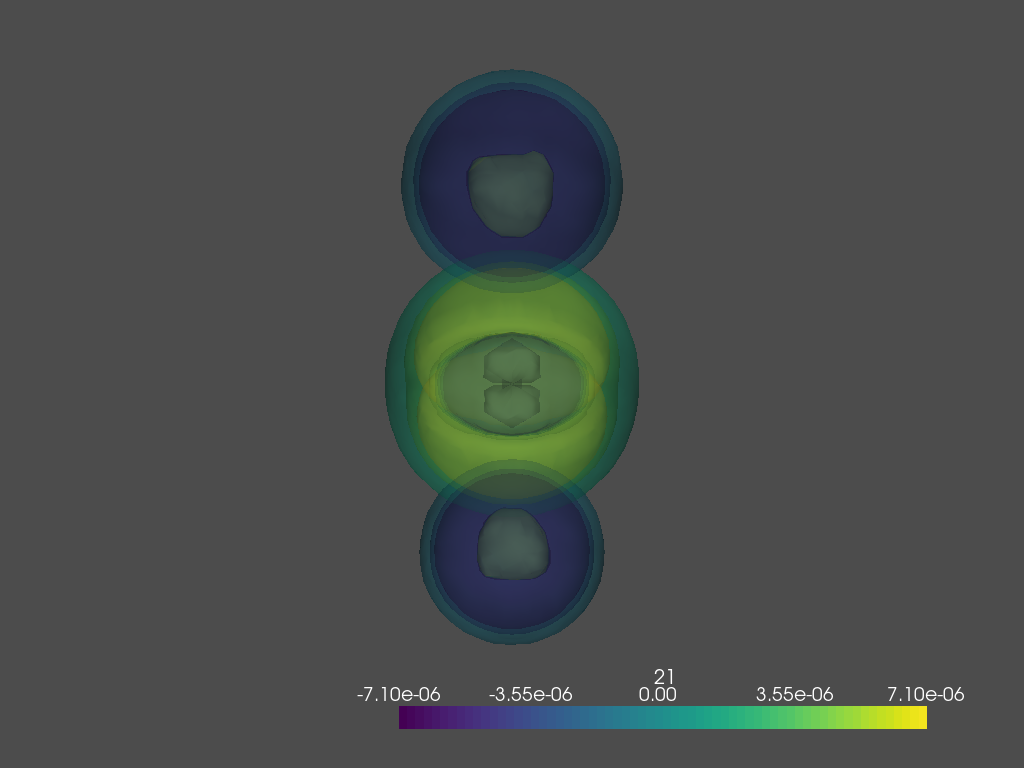

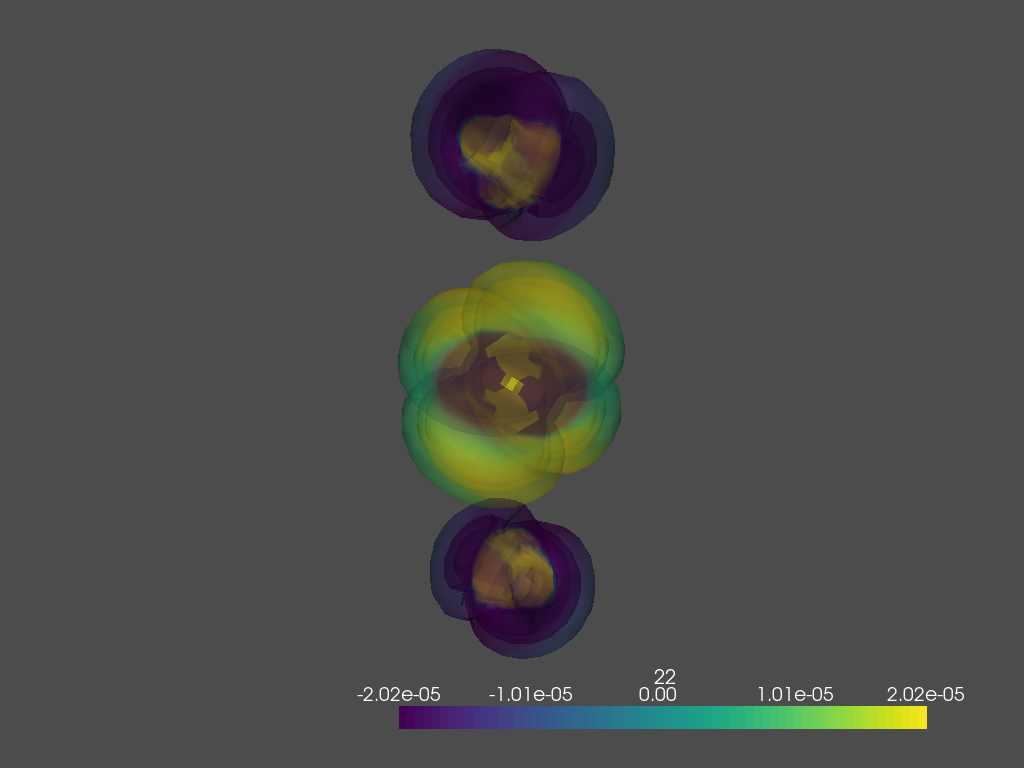

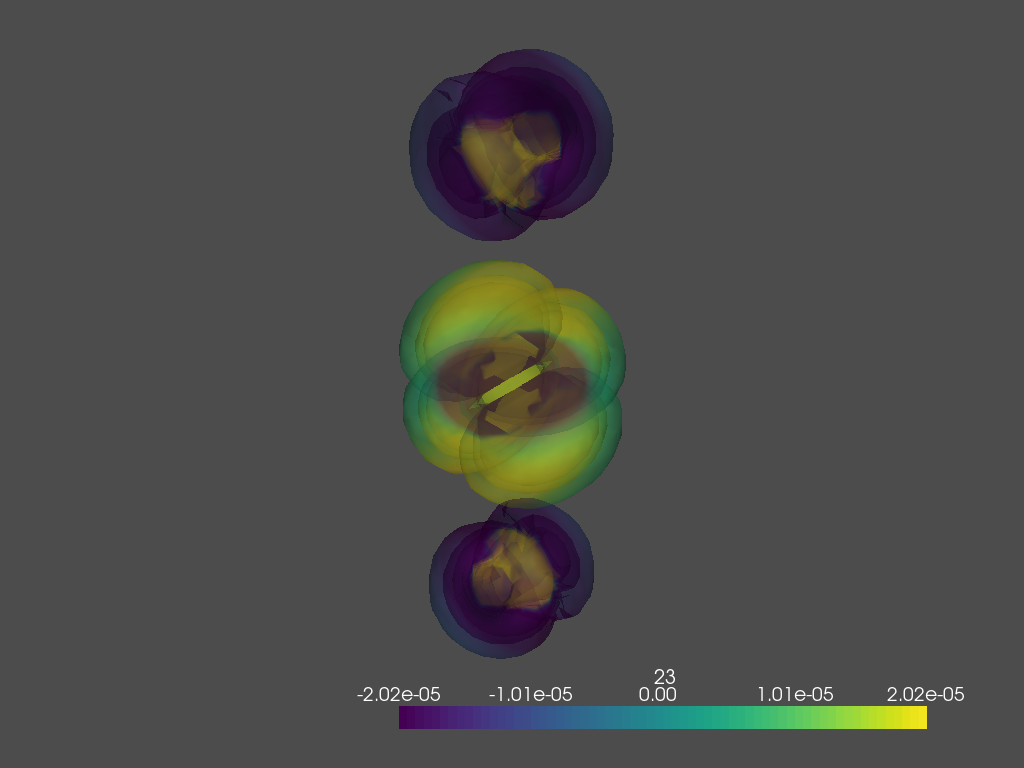

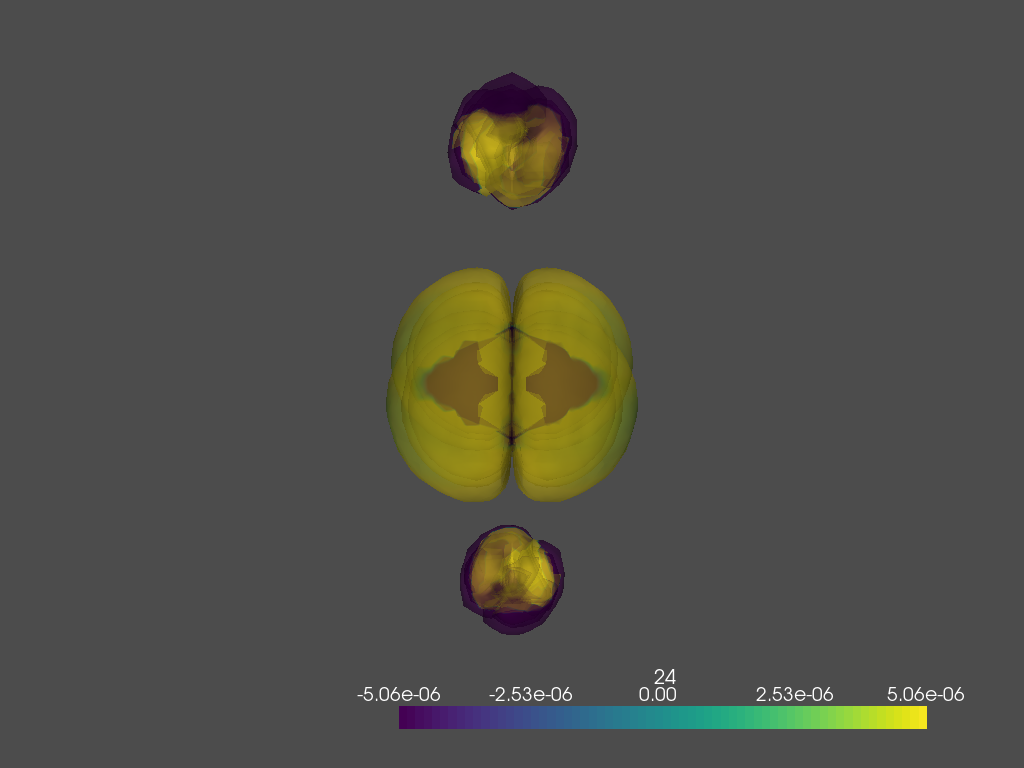

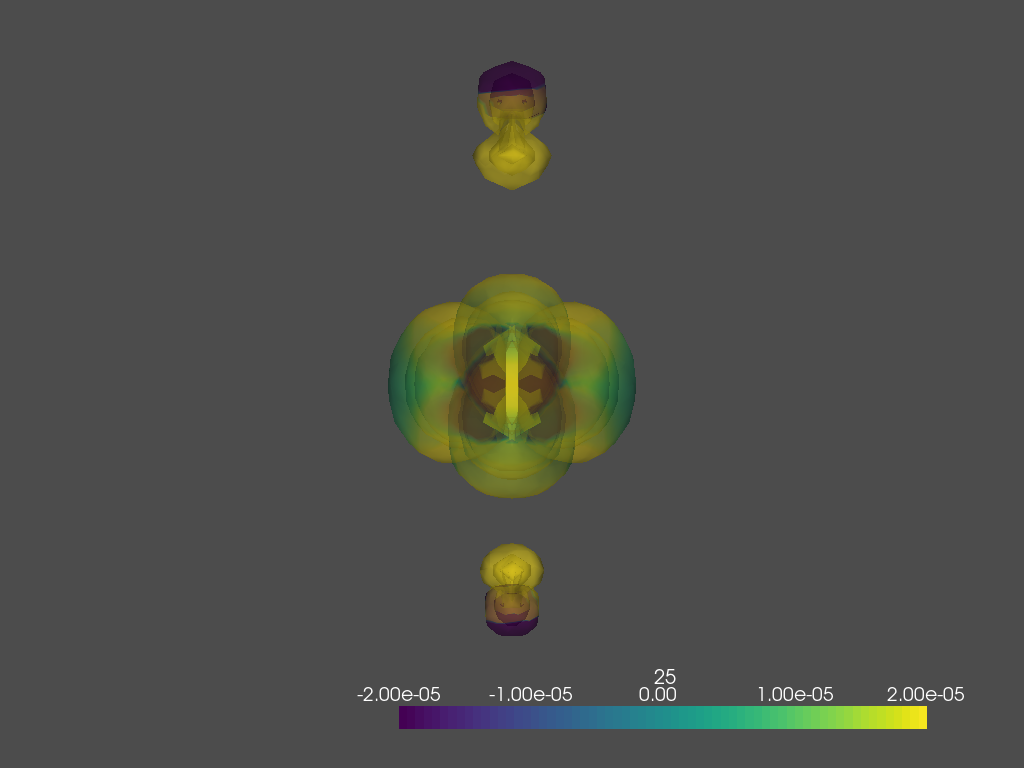

[None, None, None, None, None]

In [12]:
[mo.plotOrb(orbN = [item], interactive = False, showAtoms = False) for item in orbList]

In [13]:
mo.wavefunction.molecular_orbital

<function qc.wavefunction.molecular_orbital(coords, mocoeffs, gbasis)>

In [14]:
# Imports from orbPlot.py

sys.path.append(chemPath)
# from chemlab.qc import wavefunction  # Can't seem to get this version to work - likely due to init files?
from qc import wavefunction  # This is OK with Base or subdir set
from qc.utils import reduce  # For additional function settings (or may need to patch?)

In [15]:
import types

mo.wavefunction.getbfs.reduce = types.MethodType(reduce, mo)

# Tried patching all subfuncs/classes here, but doesn't seem to work like that!

In [16]:
mo.calcOrb()

In [17]:
dir(mo.wavefunction.getbfs)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'reduce']

In [18]:
mo.wavefunction.mo

AttributeError: module 'qc.wavefunction' has no attribute 'mo'